# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.059275e+01     6.647135e+00
 * time: 0.004951000213623047
     1     2.782091e+01     5.093532e+00
 * time: 0.013962030410766602
     2     2.231418e+01     7.366702e+00
 * time: 0.036184072494506836
     3     1.448792e+01     2.397361e+00
 * time: 0.06223607063293457
     4     1.200968e+01     1.487774e+00
 * time: 0.08371686935424805
     5     1.131441e+01     7.577676e-01
 * time: 0.1062159538269043
     6     1.071766e+01     1.489469e+00
 * time: 0.12357592582702637
     7     1.027504e+01     8.001297e-01
 * time: 0.14140796661376953
     8     1.003326e+01     6.007852e-01
 * time: 0.15947484970092773
     9     9.890290e+00     5.479687e-01
 * time: 0.1773519515991211
    10     9.733415e+00     7.178129e-01
 * time: 0.19535088539123535
    11     9.601174e+00     6.119354e-01
 * time: 0.21329188346862793
    12     9.499737e+00     1.324869e+00
 * time: 0.2267458438873291
    13     9.346045e+00     1.129072e+00
 * time:

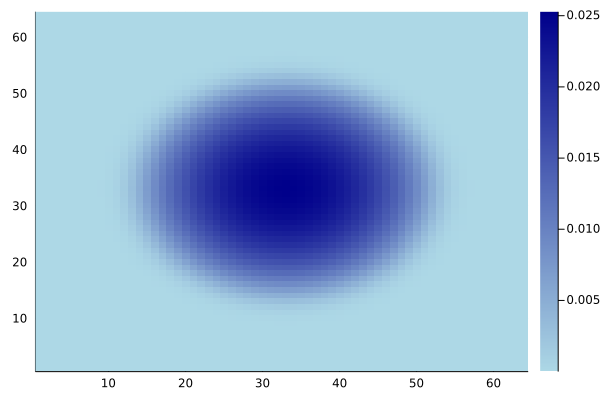

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)